# Lab 3-3 데이터 전처리

## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 데이터 준비

In [2]:
# 0-34 인덱스 까지는 도미, 나머지 14개는 빙어
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### Numpy를 사용하여 테스트 데이터 생성

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

## Scikit Learn으로 훈련 세트와 테스트 세트 작성

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=50)

In [11]:
print(test_target)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=50)

In [13]:
print(test_target)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


## 모델 생성, 훈련 및 평가

In [14]:
kn = KNeighborsClassifier()

In [15]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [16]:
kn.score(test_input, test_target)

1.0

## 문제점

### 길이가 25, 무게가 150인 데이터는 도미로 분류되는것이 맞음

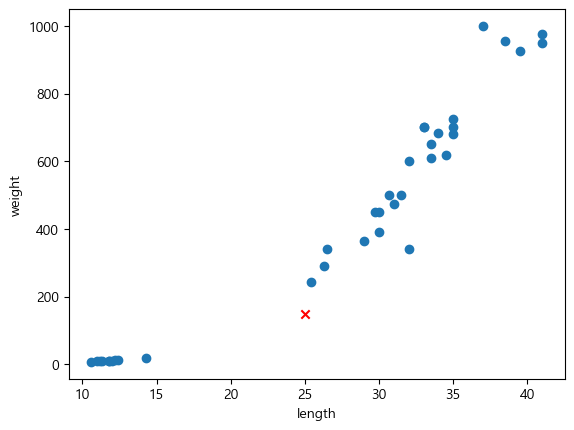

In [17]:
columns = ['length', 'weight']
df_train_input = pd.DataFrame(train_input, columns=columns)
df_test_input = pd.DataFrame(test_input, columns=columns)


plt.scatter(x=df_train_input.length, y=df_train_input.weight)
plt.scatter(25, 150, marker="x", color="red")
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

### 빙어로 평가됨

In [18]:
kn.predict([[25,150]])

array([0.])

## 문제점 분석

### 모델에서 가장 가까운 데이터를 찾음

#### 샘플에서 가장 가까운 데이터를 찾는 kneighbors 메소드 호출

In [19]:
distance, indexes = kn.kneighbors([[25,150]])

Text(0, 0.5, 'weight')

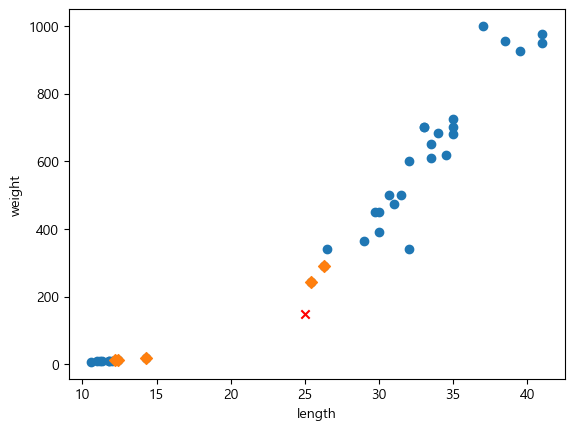

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='x', color='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]
  [ 26.3 290. ]]]


In [21]:
print(train_target[indexes])

[[1. 0. 0. 0. 1.]]


In [22]:
print(distance)

[[ 92.00086956 130.73859415 137.17988191 138.39320793 140.00603558]]


### 축척 조정 후 데이터 시각화하여 확인

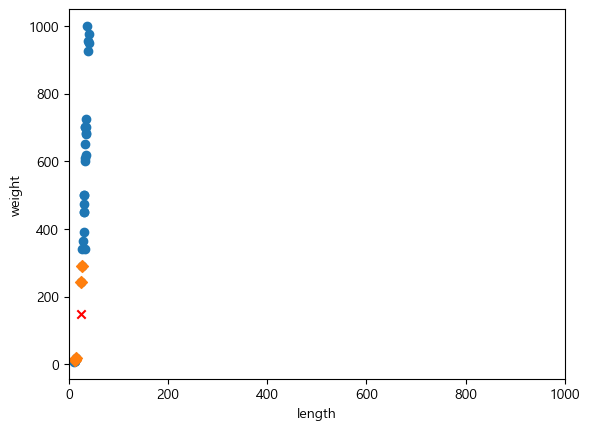

In [25]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='x', color='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()